<h2 style="text-align:center;">IMDb Movie Review Sentiment Analysis</h2>

<h3 style="text-align:center;">NLP Project <br>- Traditional approaches (TF-IDF with classifiers) <br>- Advanced deep learning models (LSTM and BERT).</h3>

---



## Table of Contents
1. [Introduction](#introduction)
2. [Data Loading and Exploration](#data-loading)
3. [Text Preprocessing](#preprocessing)
4. [Feature Extraction](#feature-extraction)
5. [Traditional ML Models](#traditional-ml)



## 1. Introduction <a name="introduction"></a>

This project performs sentiment analysis on IMDb movie reviews using various machine learning and deep learning techniques. We compare traditional approaches (TF-IDF with classifiers) with advanced deep learning models (LSTM and BERT).

In [ ]:
# Install required packages
!pip install tensorflow transformers pandas numpy matplotlib nltk seaborn

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
gpu_device_name = tf.test.gpu_device_name()
if gpu_device_name:
    print("GPU device name:", gpu_device_name)
else:
    print("No GPU found")

TensorFlow version: 2.18.0
No GPU found


## 2. Data Loading and Exploration <a name="data-loading"></a>

First, we load and explore the dataset to understand its structure and characteristics.

**Importing Required Libraries**

We import necessary packages for:
- Data manipulation (pandas, numpy)
- Data visualization (matplotlib, seaborn)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
sns.set_theme()

**Loading and Initial Exploration**

Load the dataset and perform initial inspection:
- Check dataset dimensions
- Examine first few rows
- Identify missing values
- Analyze sentiment distribution

In [ ]:
# Load the data
df = pd.read_csv('/content/data_imdb.csv')

# Initial exploration
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nMissing values:")
print(df.isnull().sum())
print("\nSentiment distribution:")
print(df['sentiment'].value_counts())

Dataset shape: (50000, 2)

First 5 rows:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Missing values:
review       0
sentiment    0
dtype: int64

Sentiment distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


**Review Length Analysis**

Analyze the length of reviews:
- Create new column for review length
- Calculate descriptive statistics
- Visualize distribution of lengths


Review length statistics:
count    50000.000000
mean      1309.367720
std        989.759532
min          7.000000
25%        699.000000
50%        970.000000
75%       1590.000000
max      13704.000000
Name: review_length, dtype: float64


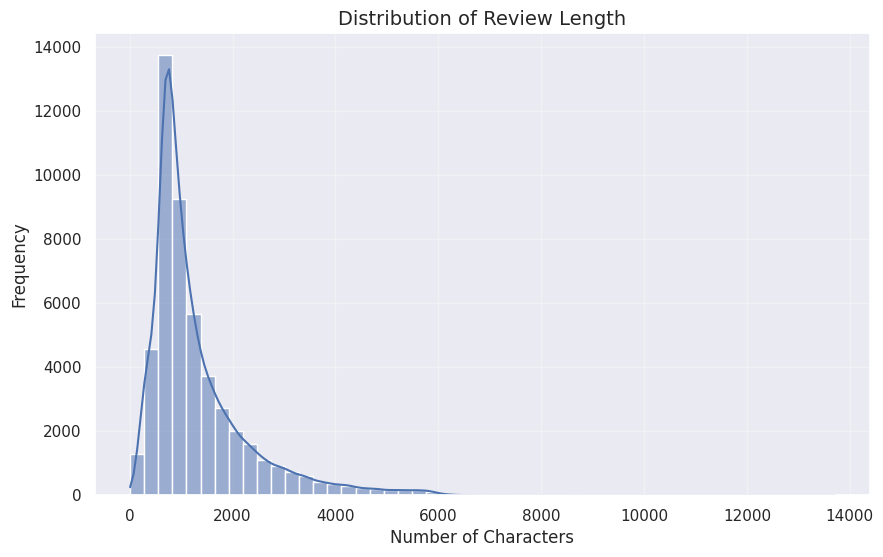

In [ ]:
# Analyze review length
df['review_length'] = df['review'].apply(len)
print("\nReview length statistics:")
print(df['review_length'].describe())

# Plot review length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Length', fontsize=14)
plt.xlabel('Number of Characters', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

## 3. Text Preprocessing <a name="preprocessing"></a>

Clean and prepare the text data for analysis by removing noise and standardizing the format.

**Importing Required Libraries**

We import necessary packages for:
- Regular expressions (`re`) for pattern matching
- NLTK for natural language processing
- Text processing tools (stopwords, tokenizer, lemmatizer)

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

**Downloading NLTK Resources**

Download required NLTK data packages:
- `punkt` for tokenization
- `stopwords` for common English stopwords
- `wordnet` for lemmatization
- `punkt_tab` for improved tokenization

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

**Initializing Text Processing Tools**

Set up our text cleaning pipeline components:
- Lemmatizer to reduce words to base forms
- Stopwords list for filtering common words

In [ ]:
# Initialize text processing tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

**Text Preprocessing Function**

This comprehensive cleaning function performs:
1. Case normalization (lowercasing)
2. HTML tag removal
3. Special character/number removal
4. Tokenization
5. Stopword removal
6. Lemmatization
7. Rejoining tokens into clean text

In [ ]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

**Applying Preprocessing to Reviews**

Apply our cleaning function to all reviews:
- Creates new column with cleaned text
- Shows sample before/after comparison

In [ ]:
# Apply preprocessing
df['cleaned_review'] = df['review'].apply(preprocess_text)
print("\nSample cleaned reviews:")
print(df[['review', 'cleaned_review']].head())


Sample cleaned reviews:
                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                      cleaned_review  
0  one reviewer mentioned watching oz episode you...  
1  wonderful little production filming technique ...  
2  thought wonderful way spend time hot summer we...  
3  basically there family little boy jake think t...  
4  petter matteis love time money visually stunni...  


## 4. Feature Extraction <a name="feature-extraction"></a>

Convert text into numerical features that machine learning models can process.


**TF-IDF Vectorization:**
TF-IDF (Term Frequency-Inverse Document Frequency) is used to convert text data into numerical features that represent the importance of words in documents relative to their frequency across all documents.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer with maximum 5000 features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Transform cleaned reviews into TF-IDF features
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_review'])

**Explanation:**
- `TfidfVectorizer` converts text to TF-IDF features matrix
- `max_features=5000` limits the vocabulary size to top 5000 terms
- `fit_transform()` learns vocabulary and transforms text data in one step
- Output is a sparse matrix where each row represents a review and columns represent TF-IDF scores for each word





**Label Encoding:**

Convert sentiment labels from text to numerical values for machine learning.

In [ ]:
# Convert sentiment to numerical values (positive=1, negative=0)
y = df['sentiment'].map({'positive': 1, 'negative': 0})

**Explanation:**
- Maps 'positive' sentiment to 1 and 'negative' to 0
- This binary encoding is required for most classification algorithms


**Train-Test Split:**

Split the dataset into training and testing subsets for model evaluation.

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y,
    test_size=0.2,
    random_state=42
)

# Display dataset sizes
print(f"\nTraining set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (40000, 5000)
Testing set size: (10000, 5000)


**Explanation:**
- `train_test_split` randomly divides the data while maintaining class proportions
- `test_size=0.2` allocates 20% of data for testing
- `random_state=42` ensures reproducible splits
- Shapes are printed to verify proper splitting

## 5. Traditional ML Models <a name="traditional-ml"></a>

Train and evaluate several traditional machine learning classifiers.


**Importing Required Libraries:**

First, we import the necessary machine learning models and evaluation metrics:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

Explanation:
- `LogisticRegression`: A linear model for binary classification
- `MultinomialNB`: Naive Bayes classifier for multinomial distributed data
- `SVC`: Support Vector Machine classifier
- `RandomForestClassifier`: Ensemble of decision trees
- `accuracy_score`: Metric to evaluate classification accuracy
- `classification_report`: Comprehensive report of precision, recall, f1-score

**Model Initialization:**

We initialize four different classification models with their default or specified parameters:

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(kernel='linear', probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

Explanation:
- `LogisticRegression()`: Default parameters
- `MultinomialNB()`: Default parameters suitable for text classification
- `SVC()`: Using linear kernel with probability estimates enabled
- `RandomForestClassifier()`: 100 decision trees with fixed random state for reproducibility


**Model Training and Evaluation:**

We train each model and evaluate its performance on the test set:

In [ ]:
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


Training Logistic Regression...
Logistic Regression Accuracy: 0.8847
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


Training Naive Bayes...
Naive Bayes Accuracy: 0.8489
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


Training SVM...
SVM Accuracy: 0.8862
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      4961
      

Explanation:
1. **Training Loop**:
   - Iterates through each model in our dictionary
   - Prints the model name being trained
   - Fits the model to our training data (`X_train`, `y_train`)

2. **Prediction**:
   - Makes predictions on the test set (`X_test`)
   
3. **Evaluation**:
   - Calculates and prints accuracy score (rounded to 4 decimal places)
   - Generates a full classification report showing:
     - Precision: Proportion of true positives among predicted positives
     - Recall: Proportion of actual positives correctly identified
     - F1-score: Harmonic mean of precision and recall
     - Support: Number of samples in each class

---

#### 1. Model and Vectorizer Persistence

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import re
from bs4 import BeautifulSoup
import warnings

# Suppress all DeprecationWarnings
warnings.simplefilter("ignore", category=DeprecationWarning)

In [ ]:
# Save the SVM model and vectorizer
svm_model = models["SVM"]
joblib.dump(svm_model, 'sentiment_model_svm.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

**Key Points:**
- `joblib` is preferred over `pickle` for scikit-learn models as it's more efficient with NumPy arrays
- We save:
  - The trained SVM model (`sentiment_model_svm.pkl`)
  - The TF-IDF vectorizer (`tfidf_vectorizer.pkl`) which contains the vocabulary mapping
- Both components must be saved to ensure consistent preprocessing of new data

#### 2. Prediction Function

In [ ]:
def predict_sentiment(text):
    # Load the model and vectorizer
    model = joblib.load('sentiment_model_svm.pkl')
    vectorizer = joblib.load('tfidf_vectorizer.pkl')

    # Preprocess the text
    cleaned_text = preprocess_text(text)

    # Vectorize the text
    text_vector = vectorizer.transform([cleaned_text])

    # Make prediction
    prediction = model.predict(text_vector)
    probability = model.predict_proba(text_vector)

    return prediction[0], probability[0]

**Function Workflow:**
1. **Model Loading**: Restores both the classifier and vectorizer from disk
2. **Text Cleaning**: Applies the same preprocessing used during training
3. **Feature Transformation**: Uses the saved vectorizer to create TF-IDF features
4. **Prediction**: Returns both the class label and probability distribution

In [ ]:
sample_reviews = [
    "This movie was absolutely fantastic! The acting was superb and the storyline was captivating.",
    "I hated every minute of this film. It was boring and poorly made.",
    "The cinematography was beautiful but the plot was confusing and hard to follow."
]

print("\nTesting with sample reviews:")
for review in sample_reviews:
    pred, prob = predict_sentiment(review)
    print(f"\nReview: {review}")
    print(f"Predicted sentiment: {pred}")
    print(f"Probability: {prob}")


Testing with sample reviews:

Review: This movie was absolutely fantastic! The acting was superb and the storyline was captivating.
Predicted sentiment: 1
Probability: [0.00505837 0.99494163]

Review: I hated every minute of this film. It was boring and poorly made.
Predicted sentiment: 0
Probability: [9.99990683e-01 9.31660355e-06]

Review: The cinematography was beautiful but the plot was confusing and hard to follow.
Predicted sentiment: 0
Probability: [0.80151646 0.19848354]


---